In [17]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F; font-weight:bold;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)

<h2><b><u>Case Study - Wholesale Market Prices: Organic versus Conventional</u></b></h2>
In this exercise you will practice using iterators, list comprehensions, generator comprehensions and generator objects. 

<h3><b><i>Background</i></b></h3>
When going to the grocery store in the United States might have the option of purchasing produce grown by either conventional or organic methods. Produce qualifies as certified organic if within the last three years, there have been no prohibted substances applid to the soil [1]. Organic produce is available in around 75% of conventional grocery stores and accounts for 4% of total food sales, with an estimated retail sale value of 28.4 billion in 2012 within the U.S.[2]. 

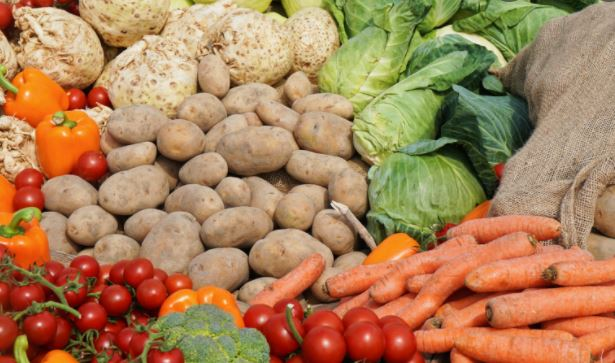

<h3><b><i>Goal</i></b></h3>
The goal of this case study is to examine <b><i>wholesale market prices for organic and conventional produce for selected vegetables in the year 2012</i></b>. You will answer some questions about the dataset discussed below using based on what you've learned in DataCamp's what you've learned in DataCamp's <a href = "https://learn.datacamp.com/courses/python-data-science-toolbox-part-2">Python Data Science Toolbox (Part 2)</a> and <a href = "https://learn.datacamp.com/courses/introduction-to-importing-data-in-python">Introduction to Importing Data with Python</a> using <b><i>list comprehensions</i></b> and <b><i>generators</i></b> and working with subsets of the data using <b><i>iterators</i></b> and <b><i>generator objects</i></b>. 

<h3><b><i>Data</i></b></h3>
The dataset used in this exercise is the <a href = "https://www.ers.usda.gov/data-products/organic-prices.aspx"> Wholesale Market Prices dataset</a> from the USDA [3]. This data contains <b><i>wholesale prices for both organic and conventional produce for the years 2012 & 2013</i></b>. This dataset includes price per month, the amount of produce for the wholesale price, as well as other data. In this exercise you will be working with a modified subset of the 2012 data only. 

Sources: 
<ol style = "font-size:8px">
    <li>McEvoy, Miles. 2019. "Organic 101: What the USDA Organic Label Means". USDA. https://www.usda.gov/media/blog/2012/03/22/organic-101-what-usda-organic-label-means</li>
    <li>USDA. 2021. "Organic Market Summary Trends". https://www.ers.usda.gov/topics/natural-resources-environment/organic-agriculture/organic-market-summary-and-trends/</li>
    <li>USDA. 2021. Organic Price : Wholesale vegetable prices, organic and conventional, monthly and annual, 2012-13. USDA ERS. https://www.ers.usda.gov/data-products/organic-prices.aspx </li>
    <li>Image Source: https://commons.wikimedia.org/wiki/File:A_selection_of_vegetables_01.jpg</li>
</ol>


<h3>Iterators</h3>
In the code blocks below you will practice using <b><i>iterators</i></b> on the <b><i>Wholesale Market Price 2012</i></b> data. You will work with a <b><i>pandas iterator</i></b> by reading in a chunk of data from a csv file and then practice using <b><i>Python iterators</i></b> with a <span class="bltn">list</span>. 

<h4><u>Importing Libraries, Modules, and Packages</u></h4>
In previous case studies, <b><i>libraries, modules</i></b> and/or <b><i>packages</i></b> were <span class="bltn">imported</span> in the first cell in which they were used in. From now on, we will <span class="bltn">import</span> these items in the first code cell of the case study. 

In [18]:
# Import libraries, packages, modules in this cell
# Import pandas
import pandas as pd

# Import math to use the ceiling function
import math 

First let's get familiar with what the <b><i>Wholesale Market Price 2012</i></b> data look like by reading in the full csv file and looking at only the first few rows of data. 

In [19]:
# Read in the csv file using pandas and the read_csv into a variable ws_12_df (Wholesale Market Price 2012 Data Frame). 
# Call the pd.read_csv function(file_name, header = None, skiprows = [0])
file_name = 'Data/Vegetables_2012_Cleaned.csv'
ws_12_df = pd.read_csv(file_name, header = None, skiprows = [0])

# Print the first few rows of the ws_12_df using .head()
ws_12_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Commodity,Subgroup,Package,Organic/ Conventional,Terminal Market,12-Jan,12-Feb,12-Mar,12-Apr,12-May,12-Jun,12-Jul,12-Aug,12-Sep,12-Oct,12-Nov,12-Dec,2012.00
1,Artichoke (SF only),Globe,cartons 24s,Conv,San Fran,28.58,30,30.94,18.5,13.48,17.83,30,35.26,25.75,24.66,23.47,26.29,24.12
2,Artichoke (SF only),Globe,cartons 24s,Org,San Fran,37.34,35.46,N\A,N\A,N\A,30.31,35,40.12,45.5,40.47,32.76,32.5,36.88
3,Cabbage,Round green type,40 lb cartons medium,Conv,Atlanta,N\A,N\A,N\A,N\A,N\A,N\A,N\A,16.5,N\A,N\A,N\A,N\A,16.50
4,Cabbage,Round green type,45 lb cartons medium,Org,Atlanta,33.95,36.35,29.59,24.43,29,32.94,N\A,52.77,45.5,36.78,42,45.65,37.67


<h4><u>Processing Chunks of Data - Pandas</u></h4>

Now let's practice with the <b><i>Wholesale Market Price 2012</i></b> data and treat the csv file as if it <b><i>all cannot fit into memory</i></b>. In the code block below you will work with a <b><i>chunk</i></b> of data consisting of the first 5 rows from the csv file. You may notice the syntax to access a <b><i>chunk with pandas</i></b> differs from what was used in Data Camp. This is because we are only looking at the <b><i>first chunk</i></b> of data, while they loop through all chunks of data. 

In the code below, the first <b><i>chunk</i></b> of data is read into a <b><i>DataFrame</i></b>. The <b><i>values</i></b> in the <b><i>DataFrame</i></b> are then converted into a <span class="bltn">nested list</span>. 

In [20]:
# NOTE: Code in this cell is complete. Make sure you understand the code before running the cell.
# Define variable chunk and set it equal to 5
chunk = 5

# Iterate through the first five rows of the Vegetables_2012.csv file as a single chunk using pandas. 
# Store the single chunk as a Python list to practice with using Python iterators in the next code block
with pd.read_csv(file_name, sep=',', chunksize = chunk, header = None, skiprows = [0]) as reader:
    ws_first_5 = pd.DataFrame(reader.get_chunk()).values.tolist()
    
    # Print the first 5 rows of the data
    print(ws_first_5)
    


[['Commodity', 'Subgroup', 'Package', 'Organic/ Conventional', 'Terminal Market', '12-Jan', '12-Feb', '12-Mar', '12-Apr', '12-May', '12-Jun', '12-Jul', '12-Aug', '12-Sep', '12-Oct', '12-Nov', '12-Dec', 2012.0], ['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Conv', 'San Fran', '28.58', '30', '30.94', '18.5', '13.48', '17.83', '30', '35.26', '25.75', '24.66', '23.47', '26.29', 24.12], ['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Org', 'San Fran', '37.34', '35.46', 'N\\A', 'N\\A', 'N\\A', '30.31', '35', '40.12', '45.5', '40.47', '32.76', '32.5', 36.88], ['Cabbage', 'Round green type', '40 lb cartons  medium', 'Conv', 'Atlanta', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', '16.5', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 16.5], ['Cabbage', 'Round green type', '45 lb cartons  medium', 'Org', 'Atlanta', '33.95', '36.35', '29.59', '24.43', '29', '32.94', 'N\\A', '52.77', '45.5', '36.78', '42', '45.65', 37.67]]


<h4><u>Python Iterators</u></h4>

The first <b><i>chunk</i></b> of data which is now stored in a <span class="bltn">nested list</span>. We can use an <b><i>iterator</i></b> to move through the data in order in <b><i>ws_first_5</i></b>. In the Code cell below, each value that is printed by <span class="bltn">next</span> is a row of data. 

In [21]:
# Create a Python iterator called ws_iter and print each line of the w_first_5 list using it
ws_iter = iter(ws_first_5)
# Create a variable counter and set it equal to chunk 
counter = chunk


# Create a while loop that prints the next value in the ws_iter. 
while counter > 0: 
    # Print the next value in ws_iter. Hint: use next()
    print(next(ws_iter))
    # Decrement counter by 1
    counter -= 1

['Commodity', 'Subgroup', 'Package', 'Organic/ Conventional', 'Terminal Market', '12-Jan', '12-Feb', '12-Mar', '12-Apr', '12-May', '12-Jun', '12-Jul', '12-Aug', '12-Sep', '12-Oct', '12-Nov', '12-Dec', 2012.0]
['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Conv', 'San Fran', '28.58', '30', '30.94', '18.5', '13.48', '17.83', '30', '35.26', '25.75', '24.66', '23.47', '26.29', 24.12]
['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Org', 'San Fran', '37.34', '35.46', 'N\\A', 'N\\A', 'N\\A', '30.31', '35', '40.12', '45.5', '40.47', '32.76', '32.5', 36.88]
['Cabbage', 'Round green type', '40 lb cartons  medium', 'Conv', 'Atlanta', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', '16.5', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 16.5]
['Cabbage', 'Round green type', '45 lb cartons  medium', 'Org', 'Atlanta', '33.95', '36.35', '29.59', '24.43', '29', '32.94', 'N\\A', '52.77', '45.5', '36.78', '42', '45.65', 37.67]


<h3>List Comprehensions and Generators</h3>
In the code blocks below you will practice <b><i>list comprehensions</i></b> and using <b><i>generators</i></b> with the <b><i>ws_first_5</i></b> <span class="bltn">nested list</span>. 

<h4><u>List Comprehension: Example 1</u></h4>

The Code cell below contains a <b><i>list comprehension</i></b>, <b><i>art_12</i></b>. <b><i>Art_12</i></b> is a <span class="bltn">list</span> which contains rows of data from <b><i>ws_first_5</i></b> that match the condition of having <span class="str">Artichoke</span> as the value occuring at postion <span class="num">0</span>.  

This particular list comprehension first specifies a variable <b><i>x</i></b> with <b><i>local scope</i></b> meaning it can only be used in that list comprehension. The result of <b><i>x</i></b> is a row in the nested list. Three Python keywords are used to accomplish the list comprehensions result. <span class="bltn">For</span> is used to <b><i>loop</i></b> through each row in <b><i>ws_first_5</i></b>, <span class="bltn">if</span> is used to incorporate <b><i>boolean logic</i></b> to check if a value matches <span class="str">Artichoke</span>, and <span class="bltn">in</span> is used to check the value at <b><i>x[0]</i></b>. 

In [22]:
# Create a variable art_12 that stores a list comprehension in which the vegetable is artichoke. 
# Hint: Search the column at index 0 to see if 'Artichoke' is in it. 
art_12 = [x for x in ws_first_5 if "Artichoke" in x[0]]

# Print the art_12 variable
print(art_12)

[['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Conv', 'San Fran', '28.58', '30', '30.94', '18.5', '13.48', '17.83', '30', '35.26', '25.75', '24.66', '23.47', '26.29', 24.12], ['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Org', 'San Fran', '37.34', '35.46', 'N\\A', 'N\\A', 'N\\A', '30.31', '35', '40.12', '45.5', '40.47', '32.76', '32.5', 36.88]]


<h4><u>List Comprehension: Example 2</u></h4>

Another example of a <b><i>list comprehension</i></b> is shown below. The variable <b><i>no_na</i></b> stores a nested list containing all rows of <b><i>ws_first_5</i></b> that do not contain the value <span class="str">"N\\\A"</span>. The structure is similar to that used in the <b><i>art_12</i></b> list comprehnsion except <span class="bltn">not in</span> is used instead of <span class="bltn">in</span>. 

In [23]:
# Create a variable no_na that stores all sublists that do not have a column containing 'N\\A'. Use a list comprehension.
# Exclude the header row. 
no_na = [x for x in ws_first_5[1:] if 'N\\A' not in x]

# Print the no_na variable
print(no_na)

[['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Conv', 'San Fran', '28.58', '30', '30.94', '18.5', '13.48', '17.83', '30', '35.26', '25.75', '24.66', '23.47', '26.29', 24.12]]


<h4><u>List Comprehension: Example 3</u></h4>
<b><i>Jan_prices</i></b> is a <b><i>list comprehension</i></b> that selects all values in <b><i>ws_first_5</i></b>'s January column (position <span class="num">6</span> in each <span class="bltn">list</span>) <span class="bltn">if</span> the value is not <span class="str">"N\\\A"</span>. The value is then converted to a <span class="num">float</span>. The <span class="bltn">sum</span> function is then used to add all valid January prices for produce in 2012. 

In [24]:
# Create a variable jan_prices that contains all wholesale prices for January 2012. Use a list comprehension and convert each element
# in the list to float. Exclude the header row and do not store 'N\\A' values. Hint: Use the column at index 6. 
jan_prices = [float(x[6]) for x in ws_first_5[1:] if 'N\\A' not in x[6]]

# Print the sum of all elements in the jan_prices list
print(sum(jan_prices))

101.81


<h4><u>Generator Expressions</u></h4>
In the Code cell below, <b><i>art_gen</i></b> is a <b><i>generator expression</i></b> that selects the same values as the <b><i>art_12 list comprehension</i></b> above but instead of storing the results in a <span class="bltn">list</span> the results are stored in a <span class="bltn">generator</span>. 

In [25]:
# Create a generator expression that contains data on artichokes from the ws_first_5 variable
# Store this as the variable art_gen
art_gen = (x for x in ws_first_5 if "Artichoke" in x[0])

# Print each item in the art_gen generator object. Hint: Use a for loop 
for i in art_gen:
    print(i)

['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Conv', 'San Fran', '28.58', '30', '30.94', '18.5', '13.48', '17.83', '30', '35.26', '25.75', '24.66', '23.47', '26.29', 24.12]
['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Org', 'San Fran', '37.34', '35.46', 'N\\A', 'N\\A', 'N\\A', '30.31', '35', '40.12', '45.5', '40.47', '32.76', '32.5', 36.88]


<h4><u>Creating a Generator</u></h4>
The <span class="bltn">Generator</span> <span class="func">chunkListGen</span> generates rows of a csv file where each row is a <span class="bltn">list</span> and the result returned by <span class="bltn">yield</span> is a <span classs="bltn">nested list</span>. <span class="func">chunkListGen</span> takes three <b><i>parameters</i></b>. The <span class="str">fileName</span>parameter is the file path and file name of the csv file to open, <span class="num">c_size</span> is an <span class="num">integer</span> value representing the size of the <b><i>chunk</i></b> to be <span class="bltn">yielded</span> by the <span class="bltn">Generator</span>, <span class="num">max_size</span> is an <span class="num">integer</span> that specifies how many times the <span class="bltn">Generator</span> should be allowed to <span class="bltn">yield</span>. 

In [26]:
# NOTE: Code in this cell is complete. Make sure you understand the code before running the cell.

# Create a Generator of the code in Iterator's 3rd code cell. 
# Must supply the file name, the size of the chunk, and the maximum number of times to allow the iterator to yield. 
def chunkListGen(fileName, c_size, max_size): 
    i = 0 
    
    with pd.read_csv(fileName, sep=',', chunksize = c_size, header = None) as reader:
        while i < max_size: 
            select_rows = pd.DataFrame(reader.get_chunk()).values.tolist()
            i += 1
            yield select_rows
    
        

<h4><u>Initializing a Generator</u></h4>

The variable <b><i>first_2</i></b> stores the initialized <span class="func">chunkListGen</span> object. The first argument is <span class="str">file_name</span> which is the <span class="str">string</span> containing the file path and name to the <b><i>Wholesale Market Price 2012</i></b> data. The second argument is <span class="num">2</span> indicating that the <span class="bltn">Generator</span> should <span class="bltn">yield</span> two rows (<span class="bltn">nested list</span> containing two interior <span class="bltn">lists</span>) each time its called. The third argument is <span class="num">2</span> which means that using <span class="bltn">next()</span> to <span class="bltn">yield</span> a chunk of data can only be done twice. 

In [27]:
# Initialize the chunkListGen() object and store it in a variable first_2. Pass as the arguments: file_name, 2, and 2.
# This means that the 'Vegetables_2012_Cleaned.csv' file will be opened. That each yield of the generator will return a 
# nested list with each sublist a row in the data and that the maximum number of times next can be called to iterate is 2. 
first_2 = chunkListGen(file_name, 2, 2) 


<h4><u>Using Next</u></h4>
<span class="bltn">Next</span> can be used to <span class="bltn">yield</span> a chunk of data from <b><i>first_2</i></b>. Call <span class="bltn">next</span> with <b><i>first_2</i></b> as the argument twice and print each result. 

In [28]:
# Below type print(next(first_2)) twice
print(next(first_2))

[[' Wholesale vegetable prices, organic and conventional, monthly and annual, 2012', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', nan], ['Commodity', 'Subgroup', 'Package', 'Organic/ Conventional', 'Terminal Market', '12-Jan', '12-Feb', '12-Mar', '12-Apr', '12-May', '12-Jun', '12-Jul', '12-Aug', '12-Sep', '12-Oct', '12-Nov', '12-Dec', 2012.0]]


<h4><u>Generator Iteration - StopIteration</u></h4>

The <b><i>first_2</i></b> <span class="bltn">Generator</span> is only allowed to <span class="bltn">yield</span> two chunks of data. <span class="bltn">Print</span> the result of calling <span class="bltn">next</span> with <b><i>first_2</i></b> for a third time. 

In [29]:
# Type print(next(first_2))
print(next(first_2))

[['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Conv', 'San Fran', 28.58, 30.0, '30.94', '18.5', '13.48', 17.83, 30, 35.26, 25.75, 24.66, 23.47, 26.29, 24.12], ['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Org', 'San Fran', 37.34, 35.46, 'N\\A', 'N\\A', 'N\\A', 30.31, 35, 40.12, 45.5, 40.47, 32.76, 32.5, 36.88]]


Even though the 'Vegetables_2012_Cleaned.csv' file has more rows in it, they cannot be accessed because the maximum number the <span class="bltn">Generator</span> is allowed to <span class="bltn">yield</span> items is set to <span class="num">2</span>. Let's calculate the maximum number of <b><i>iterations</i></b> needed to <span class="bltn">yield</span> all rows of the csv file if they're read in using a <b><i>chunk size</i></b> of <span class="num">5</span>. 

<h4><u>Generator Iterating - Determining Step Size</u></h4>
One way we can <b><i>iterate</i></b> through all the data in <span class="func">chunkListGen</span> without triggering the <span class = "str">StopIteration</span> is to determine the number of steps needed. This is what the <b><i>max_size</i></b> parameter specifies. In the Code cell below, we'll calculate how many steps are needed to call <span class="func">chunkListGen</span> with a <b><i>chunk size</i></b> of <span class="num">5</span>. Then we'll <b><i>iterate</i></b> through the <b><i>Wholesale Market Price 2012</i></b> data and <span class="bltn">print</span> each <b><i>chunk</i></b>. 

In [30]:
# The variable c is the chunk size. Set it equal to 5. The variable total_rows is the total number of rows in the csv file. 
# Set it equal to 51 and cast it to a floating point value using float()
from tkinter import N


c = 5
total_rows = float(51)

# Divide total rows by c and store this as num_times
num_times = total_rows/c

# Take the ceiling of num_times using math.ceil(). Store this as the variable num_steps
num_steps = math.ceil(num_times)

# Call the chunkListGen() function with file_name, c, and num_steps. Store this in the variable veg_gen. 
veg_gen = chunkListGen(file_name, c, num_steps)

# Use a while loop to loop while num_steps is greater than 0. Use next to return the next element in veg_gen and print it.
# Decrement num_steps by 1 each time. 
while num_steps > 0: 
    # Print the value of num_steps as a string. Do not save number of steps as a string. Use str(num_steps) in the print().
    print(str(num_steps))
    # Print the next item in the veg_gen 
    print(next(veg_gen))
    # Print a new line character
    print("\n")
    # Decrement num_steps by 1
    num_steps -= 1

11
[[' Wholesale vegetable prices, organic and conventional, monthly and annual, 2012', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', nan], ['Commodity', 'Subgroup', 'Package', 'Organic/ Conventional', 'Terminal Market', '12-Jan', '12-Feb', '12-Mar', '12-Apr', '12-May', '12-Jun', '12-Jul', '12-Aug', '12-Sep', '12-Oct', '12-Nov', '12-Dec', 2012.0], ['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Conv', 'San Fran', '28.58', '30', '30.94', '18.5', '13.48', '17.83', '30', '35.26', '25.75', '24.66', '23.47', '26.29', 24.12], ['Artichoke (SF only)', 'Globe', 'cartons  24s', 'Org', 'San Fran', '37.34', '35.46', 'N\\A', 'N\\A', 'N\\A', '30.31', '35', '40.12', '45.5', '40.47', '32.76', '32.5', 36.88], ['Cabbage', 'Round green type', '40 lb cartons  medium', 'Conv', 'Atlanta', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 'N\\A', '16.5', 'N\\A', 'N\\A', 'N\\A', 'N\\A', 16.5]]


10
[['Cabbage', 'Round green type', '45 lb cartons  medium', 'Org', 'Atlanta', '3

<h3 class="yt">Your Turn: 1</h3>
In the Code cell above, why did the last item <span class = "bltn">yielded</span> by <b><i>veg_gen</i></b> only return <span class="num">2</span> <span class="bltn">lists</span> instead of <span class="num">5</span> as in all the other <b><i>chunks</i></b> <span class="bltn"> yielded </span> by the <span class="bltn">generator</span>? Type your answer below. 

<b><u>Answer: </u></b> The next() call only reurns two lists because 52 is not divisable by 5. We used math.ceil() to ensure we will print the final two lists.


<h3 class = "yt">Your Turn: 2</h3>
In the Code cell below, the variable <b><i>select_prices</i></b> contains the first 10 rows of the <b><i>Wholesale Market Price</i></b> data as well as the column headings. Use a <b><i>list comprehension</i></b> to store the <b>June, 2012</b> prices for all values in <b><i>select_prices</i></b> as long as the value is not <span class="str">'N\\A'</span>. Then calculate and <span class="bltn">print</span> the <b>average price</b> of produce in June, 2012. 

In [59]:
# Your Turn 2: 
# Variable to work with.
select_prices = ws_12_df.values.tolist()[0:11][:]
Jun_2012 = [x[10] for x in select_prices[1:] if "N\\A" not in x[11]]
print(Jun_2012)
int_list = [int(float(i)) for i in Jun_2012]
avg = (sum(int_list) / len(Jun_2012))
print("The average price price for Jun, 2012 was", avg, "dollars.")

['17.83', '30.31', '10.81', '24.38', '12.68', '31.25', '7.84', '21.96']
The average price price for Jun, 2012 was 19.0 dollars.


<h3 class="yt">Your Turn: 3</h3>
Create a <span class="bltn">Generator</span> <span class="func">lcGen</span> that takes a <span class="bltn">list</span> as its parameter and <span class="bltn">yields</span> the element in the <span>list</span> in <b><i>lower case</i></b>. Use the provided <b><i>s_list</i></b> variable to call <span class="func">lcGen</span> you've created. Iterate and <span class="bltn">print</span> the first two strings from <span class="func">lcGen</span>. 

In [ ]:
# Your Turn 3: 
# List to convert to lower case 
s_list = ["ARTICHOKE", "CABBAGE", "CARROTS", "GREENS"]
IcGen = (x.lower() for x in s_list)
#x for x in ws_first_5 if "Artichoke" in x[0]
i = 0
for x in IcGen:
    i += 1
    if i <= 2:
        print(x)

artichoke
cabbage
